**傳統機器學習法**

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/diabetes.csv')

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
y = df['Outcome'].values
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [0]:
train_X.shape

(614, 8)

In [0]:
tsst_X.shape

(154, 8)

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predicted = clf.predict(tsst_X)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y,predicted)

0.7402597402597403

In [0]:
confusion_matrix(test_y, predicted)

array([[74, 25],
       [15, 40]])

In [0]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted2 = clf2.predict(test_X)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y,predicted2)

0.7597402597402597

In [0]:
confusion_matrix(test_y,predicted2)

array([[83, 16],
       [21, 34]])

**深度學習法**

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/diabetes.csv')

In [0]:
y = df['Outcome'].values
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [0]:
# starndard = (x - mean) / std
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
train_scaled_X, test_scaled_X, train_y, test_y = train_test_split(scaled_X,y, test_size = 0.2, random_state = 42)

In [0]:
train_scaled_X.shape

(614, 8)

In [0]:
n_hidden_1 = 4 
n_hidden_2 = 4 
n_input    = 8  

training_epochs = 100
batch_size = 16

In [0]:

import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W0626 05:56:30.067168 140489606432640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 05:56:30.113950 140489606432640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 05:56:30.121908 140489606432640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_scaled_X, train_y,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(test_scaled_X, test_y))

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 0s 88us/step - loss: 0.4637 - acc: 0.7704 - val_loss: 0.5422 - val_acc: 0.7143
Epoch 2/100
614/614 [==============================] - 0s 77us/step - loss: 0.4634 - acc: 0.7736 - val_loss: 0.5411 - val_acc: 0.7143
Epoch 3/100
614/614 [==============================] - 0s 72us/step - loss: 0.4634 - acc: 0.7752 - val_loss: 0.5408 - val_acc: 0.7143
Epoch 4/100
614/614 [==============================] - 0s 72us/step - loss: 0.4633 - acc: 0.7769 - val_loss: 0.5409 - val_acc: 0.7143
Epoch 5/100
614/614 [==============================] - 0s 71us/step - loss: 0.4632 - acc: 0.7736 - val_loss: 0.5405 - val_acc: 0.7143
Epoch 6/100
614/614 [==============================] - 0s 71us/step - loss: 0.4629 - acc: 0.7769 - val_loss: 0.5407 - val_acc: 0.7143
Epoch 7/100
614/614 [==============================] - 0s 70us/step - loss: 0.4628 - acc: 0.7752 - val_loss: 0.5406 - val_acc: 0.7143
Epoch 8/100
614/

In [0]:
predicted3 = model.predict(test_scaled_X)

In [0]:
predicted3 = (predicted3.flatten() > 0.5 ).astype(int)

In [0]:
accuracy_score(test_y, predicted3)

0.7077922077922078

In [0]:
confusion_matrix(test_y, predicted3)

array([[72, 27],
       [18, 37]])

**選擇優化器**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [0]:
def tarinProcess(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = classifier.fit(train_scaled_X, train_y,
                        batch_size=16,
                        epochs=100,
                        verbose=0,
                        validation_data=(test_scaled_X, test_y))
    return history

In [0]:
history1 = tarinProcess('sgd')

In [0]:
history2 = tarinProcess('RMSprop')

In [0]:
history3 = tarinProcess('Adagrad')

In [0]:
history4 = tarinProcess('Adadelta')

In [0]:

history5 = tarinProcess('Adam')

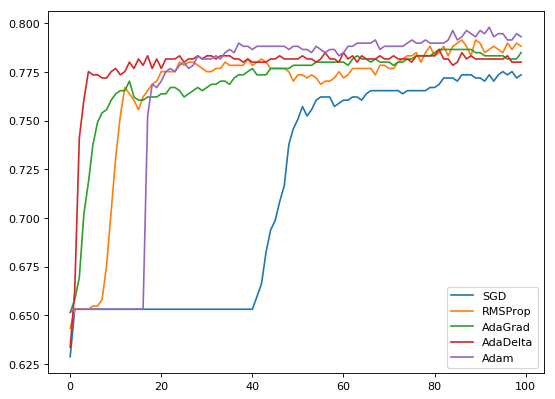

In [0]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history['acc'], label='SGD')
plt.plot(history2.epoch, history2.history['acc'], label='RMSProp')
plt.plot(history3.epoch, history3.history['acc'], label='AdaGrad')
plt.plot(history4.epoch, history4.history['acc'], label='AdaDelta')
plt.plot(history5.epoch, history5.history['acc'], label='Adam')
plt.legend()
plt.show()

**K-fold 交叉驗證**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [0]:

def buildClassifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return classifier

In [0]:
classifier = KerasClassifier(build_fn = buildClassifier, batch_size = 10, epochs = 100, optimizer = 'adam',verbose=0)
accuracies = cross_val_score(estimator = classifier, X = train_scaled_X, y = train_y, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()

In [67]:
mean

0.760535785732596

In [68]:
variance

0.02601780246833348

**Dropout**

In [0]:
from keras.layers import Dense, Dropout

In [0]:

def buildClassifier2(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return classifier

In [0]:
classifier = KerasClassifier(build_fn = buildClassifier2, batch_size = 10, epochs = 100, optimizer = 'adam',verbose=0)
accuracies2 = cross_val_score(estimator = classifier, X = train_scaled_X, y = train_y, cv = 5)
mean2 = accuracies2.mean()
variance2 = accuracies2.std()

In [76]:
mean2

0.7670798334323229

In [77]:
variance2

0.02410041854669776

**Grid Search**

In [0]:
from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = buildClassifier2, epochs = 100, verbose = 0)
parameters = {'batch_size': [10, 15],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2)
grid_search     = grid_search.fit(train_scaled_X, train_y)
best_parameters = grid_search.best_params_
best_accuracy   = grid_search.best_score_

In [80]:
best_parameters

{'batch_size': 15, 'optimizer': 'rmsprop'}

In [81]:
best_accuracy

0.7671009771986971

**比較不同機器學習模型**

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/diabetes.csv')

In [0]:
y = df['Outcome'].values
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(scaled_X,y, test_size = 0.2, random_state = 42)

In [0]:
n_input = 8
n_hidden_1 = 4
n_hidden_2 = 4

In [0]:

import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense, Dropout
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dropout(rate=0.2))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
batch_size = 15
training_epochs = 100
history = model.fit(train_X, train_y,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=0,
                    validation_data=(test_X, test_y))

In [0]:
predicted = (model.predict(test_X) > 0.5).astype(int)

In [92]:
accuracy_score(test_y, predicted)

0.7337662337662337

In [93]:
confusion_matrix(test_y, predicted)

array([[75, 24],
       [17, 38]])

In [0]:
pred_y = model.predict(test_X)

In [0]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(test_y, pred_y)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


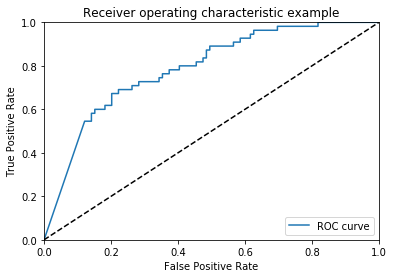

In [96]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [99]:
from sklearn.metrics import auc
auc(fpr_ary, tpr_ary)

0.7893480257116621

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability = True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


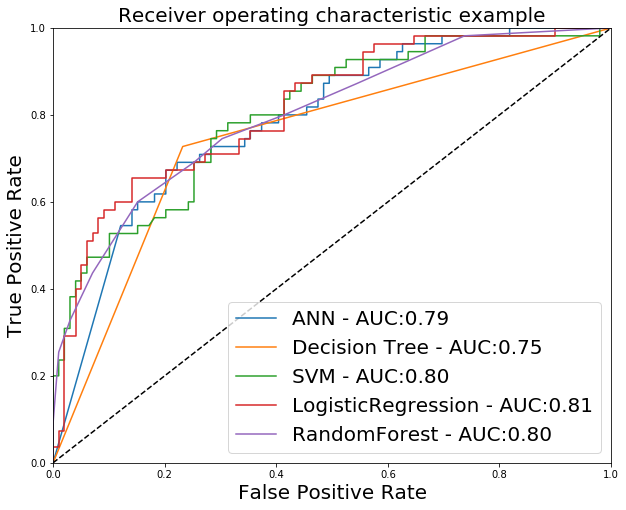

In [102]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [10,8])
for clf, title in zip([model,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    else:
        pred_y = clf.predict(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, pred_y)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [0]:
--